# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1943: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    #"dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]


In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = ["brazil", "chile", "mexico", "peru"]
)


2023-02-20 00:30:40,538 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-02-20 00:30:40,539 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-02-20 00:30:40,540 - INFO - 	Setting export engine to 'sqlite'.
2023-02-20 00:30:40,557 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-02-20 00:30:40,558 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-02-20 00:30:40,560 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-02-20 00:30:40,560 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-02-20 00:30:40,562 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-02-20 00:30:40,563 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-02-20 00:30:40,565 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [25]:
#sisepuede.attribute_strategy.table
import inspect
import sqlalchemy
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}")


In [4]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0]
strats_run += list(range(3001, 3007))
strats_run += list(range(3018, 3021))
strats_run += list(range(3025, 3028))
strats_run += list(range(3030, 3034))

dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2

)

2023-02-20 00:35:14,661 - INFO - Running AFOLU model
2023-02-20 00:35:14,960 - INFO - AFOLU model run successfully completed
2023-02-20 00:35:14,961 - INFO - Running CircularEconomy model
2023-02-20 00:35:15,059 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:35:15,059 - INFO - Running IPPU model
2023-02-20 00:35:15,160 - INFO - IPPU model run successfully completed
2023-02-20 00:35:15,161 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:35:15,194 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:35:15,339 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:35:15,340 - INFO - Running Energy model (Electricity: trying to call Julia)
2023-02-20 00:35:15,402 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_inter

2023-20-Feb 00:35:16.394 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-20-Feb 00:35:16.425 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-20-Feb 00:35:46.955 Started modeling scenario.
2023-20-Feb 00:36:20.346 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:36:20,608 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:36:20,628 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:36:20,707 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:36:20,710 - INFO - Model run for primary_id = 0 successfully completed in 66.05 seconds.
2023-02-20 00:36:20,716 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:36:21,006 - INFO - AFOLU model run successfully completed
2023-02-20 00:36:21,007 - INFO - Running CircularEconomy model
2023-02-20 00:36:21,095 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:36:21,095 - INFO - Running IPPU model
2023-02-20 00:36:21,190 - INFO - IPPU model run successfully completed
2023-02-20 00:36:21,191 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:36:21,224 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:36:21,350 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:36:21,351 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:36:23.711 Started modeling scenario.
2023-20-Feb 00:36:34.880 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:36:35,123 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:36:35,126 - INFO - Model run for primary_id = 5005 successfully completed in 14.41 seconds.
2023-02-20 00:36:35,604 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-02-20 00:36:35,608 - INFO - Running AFOLU model
2023-02-20 00:36:35,913 - INFO - AFOLU model run successfully completed
2023-02-20 00:36:35,914 - INFO - Running CircularEconomy model
2023-02-20 00:36:35,993 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:36:35,994 - INFO - Running IPPU model
2023-02-20 00:36:36,076 - INFO - IPPU model run successfully completed
2023-02-20 00:36:36,077 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:36:36,109 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:36:36,229 - INFO - NonElectricEnergy without F

2023-20-Feb 00:36:37.507 Started modeling scenario.
2023-20-Feb 00:36:50.291 Finished modeling scenario.


2023-02-20 00:36:50,511 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:36:50,541 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:36:50,630 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:36:50,634 - INFO - Model run for primary_id = 6006 successfully completed in 15.03 seconds.
2023-02-20 00:36:50,638 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:36:50,968 - INFO - AFOLU model run successfully completed
2023-02-20 00:36:50,969 - INFO - Running CircularEconomy model
2023-02-20 00:36:51,061 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:36:51,062 - INFO - Running IPPU model
2023-02-20 00:36:51,155 - INFO - IPPU model run successfully completed
2023-02-20 00:36:51,156 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:36:51,189 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:36:51,334 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:36:51,335 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:36:52.625 Started modeling scenario.
2023-20-Feb 00:37:03.936 Finished modeling scenario.


2023-02-20 00:37:04,151 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:37:04,231 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:37:04,235 - INFO - Model run for primary_id = 7007 successfully completed in 13.6 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:37:04,640 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:37:04,649 - INFO - Running AFOLU model
2023-02-20 00:37:04,957 - INFO - AFOLU model run successfully completed
2023-02-20 00:37:04,958 - INFO - Running CircularEconomy model
2023-02-20 00:37:05,057 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:37:05,058 - INFO - Running IPPU model
2023-02-20 00:37:05,139 - INFO - IPPU model run successfully completed
2023-02-20 00:37:05,140 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:37:05,170 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:37:05,286 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:37:05,286 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-20-Feb 00:37:06.500 Started modeling scenario.
2023-20-Feb 00:37:18.242 Finished modeling scenario.


2023-02-20 00:37:18,455 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:37:18,530 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:37:18,533 - INFO - Model run for primary_id = 8008 successfully completed in 13.88 seconds.
2023-02-20 00:37:18,543 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:37:18,812 - INFO - AFOLU model run successfully completed
2023-02-20 00:37:18,813 - INFO - Running CircularEconomy model
2023-02-20 00:37:18,896 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:37:18,897 - INFO - Running IPPU model
2023-02-20 00:37:18,980 - INFO - IPPU model run successfully completed
2023-02-20 00:37:18,981 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:37:19,013 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:37:19,132 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:37:19,133 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:37:20.243 Started modeling scenario.
2023-20-Feb 00:37:32.290 Finished modeling scenario.


2023-02-20 00:37:32,516 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:37:32,596 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:37:32,599 - INFO - Model run for primary_id = 9009 successfully completed in 14.06 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:37:33,014 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:37:33,018 - INFO - Running AFOLU model
2023-02-20 00:37:33,275 - INFO - AFOLU model run successfully completed
2023-02-20 00:37:33,276 - INFO - Running CircularEconomy model
2023-02-20 00:37:33,357 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:37:33,358 - INFO - Running IPPU model
2023-02-20 00:37:33,441 - INFO - IPPU model run successfully completed
2023-02-20 00:37:33,441 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:37:33,483 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:37:33,617 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:37:33,618 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-20-Feb 00:37:34.893 Started modeling scenario.
2023-20-Feb 00:37:46.973 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:37:47,179 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:37:47,203 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:37:47,288 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:37:47,292 - INFO - Model run for primary_id = 10010 successfully completed in 14.27 seconds.
2023-02-20 00:37:47,306 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:37:47,644 - INFO - AFOLU model run successfully completed
2023-02-20 00:37:47,645 - INFO - Running CircularEconomy model
2023-02-20 00:37:47,735 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:37:47,735 - INFO - Running IPPU model
2023-02-20 00:37:47,838 - INFO - IPPU model run successfully completed
2023-02-20 00:37:47,839 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:37:47,874 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:37:48,017 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:37:48,018 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:37:49.205 Started modeling scenario.
2023-20-Feb 00:38:00.415 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:38:00,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:38:00,668 - INFO - Model run for primary_id = 22022 successfully completed in 13.36 seconds.
2023-02-20 00:38:01,052 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:38:01,061 - INFO - Running AFOLU model
2023-02-20 00:38:01,321 - INFO - AFOLU model run successfully completed
2023-02-20 00:38:01,322 - INFO - Running CircularEconomy model
2023-02-20 00:38:01,407 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:38:01,408 - INFO - Running IPPU model
2023-02-20 00:38:01,504 - INFO - IPPU model run successfully completed
2023-02-20 00:38:01,505 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:38:01,548 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:38:01,680 - INFO - NonElectricEnergy without

2023-20-Feb 00:38:02.934 Started modeling scenario.
2023-20-Feb 00:38:13.666 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:38:13,894 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:38:13,897 - INFO - Model run for primary_id = 23023 successfully completed in 12.84 seconds.
2023-02-20 00:38:13,901 - INFO - Running AFOLU model
2023-02-20 00:38:14,157 - INFO - AFOLU model run successfully completed
2023-02-20 00:38:14,158 - INFO - Running CircularEconomy model
2023-02-20 00:38:14,242 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:38:14,243 - INFO - Running IPPU model
2023-02-20 00:38:14,327 - INFO - IPPU model run successfully completed
2023-02-20 00:38:14,328 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:38:14,358 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:38:14,477 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:38:14,477 - INFO - R

2023-20-Feb 00:38:15.567 Started modeling scenario.
2023-20-Feb 00:38:25.474 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:38:25,708 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:38:25,710 - INFO - Model run for primary_id = 24024 successfully completed in 11.81 seconds.
2023-02-20 00:38:27,241 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:38:27,249 - INFO - Running AFOLU model
2023-02-20 00:38:27,526 - INFO - AFOLU model run successfully completed
2023-02-20 00:38:27,527 - INFO - Running CircularEconomy model
2023-02-20 00:38:27,605 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:38:27,606 - INFO - Running IPPU model
2023-02-20 00:38:27,690 - INFO - IPPU model run successfully completed
2023-02-20 00:38:27,691 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:38:27,724 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:38:27,938 - INFO - NonElectricEnergy without

2023-20-Feb 00:38:29.313 Started modeling scenario.
2023-20-Feb 00:38:40.058 Finished modeling scenario.


2023-02-20 00:38:40,267 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:38:40,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:38:40,345 - INFO - Model run for primary_id = 29029 successfully completed in 13.1 seconds.
2023-02-20 00:38:40,351 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:38:40,616 - INFO - AFOLU model run successfully completed
2023-02-20 00:38:40,617 - INFO - Running CircularEconomy model
2023-02-20 00:38:40,698 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:38:40,699 - INFO - Running IPPU model
2023-02-20 00:38:40,791 - INFO - IPPU model run successfully completed
2023-02-20 00:38:40,792 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:38:40,827 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:38:40,947 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:38:40,948 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:38:42.062 Started modeling scenario.
2023-20-Feb 00:38:52.606 Finished modeling scenario.


2023-02-20 00:38:52,821 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:38:52,841 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:38:52,920 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:38:52,923 - INFO - Model run for primary_id = 30030 successfully completed in 12.57 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:38:53,387 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:38:53,392 - INFO - Running AFOLU model
2023-02-20 00:38:53,685 - INFO - AFOLU model run successfully completed
2023-02-20 00:38:53,686 - INFO - Running CircularEconomy model
2023-02-20 00:38:53,774 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:38:53,775 - INFO - Running IPPU model
2023-02-20 00:38:53,860 - INFO - IPPU model run successfully completed
2023-02-20 00:38:53,861 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:38:53,892 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:38:54,041 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:38:54,042 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-20-Feb 00:38:55.437 Started modeling scenario.
2023-20-Feb 00:39:07.374 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:39:07,672 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:39:07,701 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:39:07,791 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:39:07,795 - INFO - Model run for primary_id = 31031 successfully completed in 14.4 seconds.
2023-02-20 00:39:07,803 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:39:08,228 - INFO - AFOLU model run successfully completed
2023-02-20 00:39:08,229 - INFO - Running CircularEconomy model
2023-02-20 00:39:08,331 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:39:08,332 - INFO - Running IPPU model
2023-02-20 00:39:08,431 - INFO - IPPU model run successfully completed
2023-02-20 00:39:08,432 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:39:08,465 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:39:08,592 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:39:08,593 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:39:09.921 Started modeling scenario.
2023-20-Feb 00:39:21.991 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:39:22,235 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:39:22,238 - INFO - Model run for primary_id = 34034 successfully completed in 14.43 seconds.
2023-02-20 00:39:22,633 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:39:22,637 - INFO - Running AFOLU model
2023-02-20 00:39:22,942 - INFO - AFOLU model run successfully completed
2023-02-20 00:39:22,943 - INFO - Running CircularEconomy model
2023-02-20 00:39:23,037 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:39:23,038 - INFO - Running IPPU model
2023-02-20 00:39:23,132 - INFO - IPPU model run successfully completed
2023-02-20 00:39:23,133 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:39:23,165 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:39:23,294 - INFO - NonElectricEnergy without

2023-20-Feb 00:39:24.583 Started modeling scenario.
2023-20-Feb 00:39:35.511 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:39:35,795 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:39:35,800 - INFO - Model run for primary_id = 35035 successfully completed in 13.16 seconds.
2023-02-20 00:39:35,807 - INFO - Running AFOLU model
2023-02-20 00:39:36,155 - INFO - AFOLU model run successfully completed
2023-02-20 00:39:36,156 - INFO - Running CircularEconomy model
2023-02-20 00:39:36,272 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:39:36,273 - INFO - Running IPPU model
2023-02-20 00:39:36,393 - INFO - IPPU model run successfully completed
2023-02-20 00:39:36,394 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:39:36,434 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:39:36,601 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:39:36,602 - INFO - R

2023-20-Feb 00:39:38.127 Started modeling scenario.
2023-20-Feb 00:39:49.547 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:39:49,795 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:39:49,797 - INFO - Model run for primary_id = 36036 successfully completed in 13.99 seconds.
2023-02-20 00:39:50,189 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:39:50,193 - INFO - Running AFOLU model
2023-02-20 00:39:50,464 - INFO - AFOLU model run successfully completed
2023-02-20 00:39:50,464 - INFO - Running CircularEconomy model
2023-02-20 00:39:50,550 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:39:50,551 - INFO - Running IPPU model
2023-02-20 00:39:50,634 - INFO - IPPU model run successfully completed
2023-02-20 00:39:50,635 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:39:50,667 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:39:50,791 - INFO - NonElectricEnergy without

2023-20-Feb 00:39:52.034 Started modeling scenario.
2023-20-Feb 00:40:02.117 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:40:02,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:40:02,365 - INFO - Model run for primary_id = 37037 successfully completed in 12.17 seconds.
2023-02-20 00:40:02,982 - INFO - Running AFOLU model
2023-02-20 00:40:03,256 - INFO - AFOLU model run successfully completed
2023-02-20 00:40:03,257 - INFO - Running CircularEconomy model
2023-02-20 00:40:03,347 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:40:03,347 - INFO - Running IPPU model
2023-02-20 00:40:03,445 - INFO - IPPU model run successfully completed
2023-02-20 00:40:03,446 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:40:03,481 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:40:03,622 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:40:03,623 - INFO - R

2023-20-Feb 00:40:04.856 Started modeling scenario.
2023-20-Feb 00:40:23.277 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:40:23,546 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:40:23,549 - INFO - Model run for primary_id = 0 successfully completed in 20.57 seconds.
2023-02-20 00:40:23,943 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:40:23,949 - INFO - Running AFOLU model
2023-02-20 00:40:24,214 - INFO - AFOLU model run successfully completed
2023-02-20 00:40:24,215 - INFO - Running CircularEconomy model
2023-02-20 00:40:24,301 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:40:24,302 - INFO - Running IPPU model
2023-02-20 00:40:24,392 - INFO - IPPU model run successfully completed
2023-02-20 00:40:24,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:40:24,425 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:40:24,549 - INFO - NonElectricEnergy without Fug

2023-20-Feb 00:40:25.676 Started modeling scenario.
2023-20-Feb 00:40:43.967 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:40:44,218 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:40:44,221 - INFO - Model run for primary_id = 5005 successfully completed in 20.27 seconds.
2023-02-20 00:40:44,224 - INFO - Running AFOLU model
2023-02-20 00:40:44,489 - INFO - AFOLU model run successfully completed
2023-02-20 00:40:44,490 - INFO - Running CircularEconomy model
2023-02-20 00:40:44,569 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:40:44,569 - INFO - Running IPPU model
2023-02-20 00:40:44,658 - INFO - IPPU model run successfully completed
2023-02-20 00:40:44,658 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:40:44,690 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:40:44,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:40:44,819 - INFO - Ru

2023-20-Feb 00:40:46.735 Started modeling scenario.
2023-20-Feb 00:41:07.516 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:41:07,781 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:41:07,785 - INFO - Model run for primary_id = 6006 successfully completed in 23.56 seconds.
2023-02-20 00:41:08,236 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:41:08,240 - INFO - Running AFOLU model
2023-02-20 00:41:08,511 - INFO - AFOLU model run successfully completed
2023-02-20 00:41:08,512 - INFO - Running CircularEconomy model
2023-02-20 00:41:08,604 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:41:08,604 - INFO - Running IPPU model
2023-02-20 00:41:08,702 - INFO - IPPU model run successfully completed
2023-02-20 00:41:08,703 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:41:08,748 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:41:08,949 - INFO - NonElectricEnergy without 

2023-20-Feb 00:41:10.059 Started modeling scenario.
2023-20-Feb 00:41:30.018 Finished modeling scenario.


2023-02-20 00:41:30,230 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:41:30,304 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:41:30,308 - INFO - Model run for primary_id = 7007 successfully completed in 22.07 seconds.
2023-02-20 00:41:30,318 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:41:30,584 - INFO - AFOLU model run successfully completed
2023-02-20 00:41:30,585 - INFO - Running CircularEconomy model
2023-02-20 00:41:30,698 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:41:30,699 - INFO - Running IPPU model
2023-02-20 00:41:30,816 - INFO - IPPU model run successfully completed
2023-02-20 00:41:30,817 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:41:30,864 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:41:31,014 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:41:31,014 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-20-Feb 00:41:32.468 Started modeling scenario.
2023-20-Feb 00:41:53.441 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:41:53,653 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:41:53,680 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:41:53,769 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:41:53,773 - INFO - Model run for primary_id = 8008 successfully completed in 23.45 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:41:54,231 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:41:54,236 - INFO - Running AFOLU model
2023-02-20 00:41:54,572 - INFO - AFOLU model run successfully completed
2023-02-20 00:41:54,572 - INFO - Running CircularEconomy model
2023-02-20 00:41:54,655 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:41:54,656 - INFO - Running IPPU model
2023-02-20 00:41:54,744 - INFO - IPPU model run successfully completed
2023-02-20 00:41:54,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:41:54,775 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:41:54,902 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:41:54,902 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-20-Feb 00:41:56.159 Started modeling scenario.
2023-20-Feb 00:42:18.313 Finished modeling scenario.


2023-02-20 00:42:18,540 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:42:18,623 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:42:18,626 - INFO - Model run for primary_id = 9009 successfully completed in 24.39 seconds.
2023-02-20 00:42:18,639 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:42:18,987 - INFO - AFOLU model run successfully completed
2023-02-20 00:42:18,988 - INFO - Running CircularEconomy model
2023-02-20 00:42:19,089 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:42:19,089 - INFO - Running IPPU model
2023-02-20 00:42:19,204 - INFO - IPPU model run successfully completed
2023-02-20 00:42:19,205 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:42:19,243 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:42:19,385 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:42:19,386 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:42:20.719 Started modeling scenario.
2023-20-Feb 00:42:38.399 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:42:38,645 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:42:38,648 - INFO - Model run for primary_id = 10010 successfully completed in 20.01 seconds.
2023-02-20 00:42:39,022 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:42:39,035 - INFO - Running AFOLU model
2023-02-20 00:42:39,301 - INFO - AFOLU model run successfully completed
2023-02-20 00:42:39,302 - INFO - Running CircularEconomy model
2023-02-20 00:42:39,384 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:42:39,385 - INFO - Running IPPU model
2023-02-20 00:42:39,474 - INFO - IPPU model run successfully completed
2023-02-20 00:42:39,474 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:42:39,504 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:42:39,624 - INFO - NonElectricEnergy without

2023-20-Feb 00:42:40.726 Started modeling scenario.
2023-20-Feb 00:42:57.428 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:42:57,678 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:42:57,680 - INFO - Model run for primary_id = 22022 successfully completed in 18.65 seconds.
2023-02-20 00:42:57,685 - INFO - Running AFOLU model
2023-02-20 00:42:57,946 - INFO - AFOLU model run successfully completed
2023-02-20 00:42:57,947 - INFO - Running CircularEconomy model
2023-02-20 00:42:58,021 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:42:58,022 - INFO - Running IPPU model
2023-02-20 00:42:58,103 - INFO - IPPU model run successfully completed
2023-02-20 00:42:58,104 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:42:58,131 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:42:58,247 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:42:58,248 - INFO - R

2023-20-Feb 00:42:59.337 Started modeling scenario.
2023-20-Feb 00:43:17.528 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:43:17,773 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:43:17,776 - INFO - Model run for primary_id = 23023 successfully completed in 20.09 seconds.
2023-02-20 00:43:18,158 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:43:18,162 - INFO - Running AFOLU model
2023-02-20 00:43:18,423 - INFO - AFOLU model run successfully completed
2023-02-20 00:43:18,424 - INFO - Running CircularEconomy model
2023-02-20 00:43:18,501 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:43:18,502 - INFO - Running IPPU model
2023-02-20 00:43:18,586 - INFO - IPPU model run successfully completed
2023-02-20 00:43:18,586 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:43:18,615 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:43:18,736 - INFO - NonElectricEnergy without

2023-20-Feb 00:43:19.851 Started modeling scenario.
2023-20-Feb 00:43:39.055 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:43:39,315 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:43:39,318 - INFO - Model run for primary_id = 24024 successfully completed in 21.16 seconds.
2023-02-20 00:43:39,326 - INFO - Running AFOLU model
2023-02-20 00:43:39,587 - INFO - AFOLU model run successfully completed
2023-02-20 00:43:39,588 - INFO - Running CircularEconomy model
2023-02-20 00:43:39,662 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:43:39,663 - INFO - Running IPPU model
2023-02-20 00:43:39,749 - INFO - IPPU model run successfully completed
2023-02-20 00:43:39,749 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:43:39,781 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:43:39,907 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:43:39,908 - INFO - R

2023-20-Feb 00:43:41.053 Started modeling scenario.
2023-20-Feb 00:43:58.195 Finished modeling scenario.


2023-02-20 00:43:58,478 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:43:58,481 - INFO - Model run for primary_id = 29029 successfully completed in 19.16 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:43:58,868 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:43:58,872 - INFO - Running AFOLU model
2023-02-20 00:43:59,126 - INFO - AFOLU model run successfully completed
2023-02-20 00:43:59,127 - INFO - Running CircularEconomy model
2023-02-20 00:43:59,202 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:43:59,203 - INFO - Running IPPU model
2023-02-20 00:43:59,295 - INFO - IPPU model run successfully completed
2023-02-20 00:43:59,295 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:43:59,328 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:43:59,458 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:43:59,458 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-20-Feb 00:44:00.581 Started modeling scenario.
2023-20-Feb 00:44:24.989 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:44:25,249 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:44:25,278 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:44:25,360 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:44:25,364 - INFO - Model run for primary_id = 30030 successfully completed in 26.49 seconds.
2023-02-20 00:44:25,371 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:44:25,704 - INFO - AFOLU model run successfully completed
2023-02-20 00:44:25,705 - INFO - Running CircularEconomy model
2023-02-20 00:44:25,796 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:44:25,797 - INFO - Running IPPU model
2023-02-20 00:44:25,890 - INFO - IPPU model run successfully completed
2023-02-20 00:44:25,891 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:44:25,929 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:44:26,092 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:44:26,092 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:44:29.191 Started modeling scenario.
2023-20-Feb 00:44:52.138 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:44:52,386 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:44:52,389 - INFO - Model run for primary_id = 31031 successfully completed in 27.02 seconds.
2023-02-20 00:44:52,772 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:44:52,778 - INFO - Running AFOLU model
2023-02-20 00:44:53,051 - INFO - AFOLU model run successfully completed
2023-02-20 00:44:53,051 - INFO - Running CircularEconomy model
2023-02-20 00:44:53,129 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:44:53,130 - INFO - Running IPPU model
2023-02-20 00:44:53,216 - INFO - IPPU model run successfully completed
2023-02-20 00:44:53,216 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:44:53,246 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:44:53,363 - INFO - NonElectricEnergy without

2023-20-Feb 00:44:54.544 Started modeling scenario.
2023-20-Feb 00:45:13.618 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:45:13,838 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:45:13,860 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:45:13,947 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:45:13,951 - INFO - Model run for primary_id = 34034 successfully completed in 21.17 seconds.
2023-02-20 00:45:13,955 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:45:14,276 - INFO - AFOLU model run successfully completed
2023-02-20 00:45:14,277 - INFO - Running CircularEconomy model
2023-02-20 00:45:14,378 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:45:14,379 - INFO - Running IPPU model
2023-02-20 00:45:14,485 - INFO - IPPU model run successfully completed
2023-02-20 00:45:14,486 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:45:14,521 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:45:14,654 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:45:14,655 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:45:15.929 Started modeling scenario.
2023-20-Feb 00:45:35.459 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:45:35,732 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:45:35,735 - INFO - Model run for primary_id = 35035 successfully completed in 21.78 seconds.
2023-02-20 00:45:36,131 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:45:36,135 - INFO - Running AFOLU model
2023-02-20 00:45:36,415 - INFO - AFOLU model run successfully completed
2023-02-20 00:45:36,415 - INFO - Running CircularEconomy model
2023-02-20 00:45:36,497 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:45:36,498 - INFO - Running IPPU model
2023-02-20 00:45:36,584 - INFO - IPPU model run successfully completed
2023-02-20 00:45:36,585 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:45:36,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:45:36,749 - INFO - NonElectricEnergy without

2023-20-Feb 00:45:37.884 Started modeling scenario.
2023-20-Feb 00:45:56.476 Finished modeling scenario.


2023-02-20 00:45:56,698 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:45:56,780 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:45:56,784 - INFO - Model run for primary_id = 36036 successfully completed in 20.65 seconds.
2023-02-20 00:45:56,788 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:45:57,106 - INFO - AFOLU model run successfully completed
2023-02-20 00:45:57,107 - INFO - Running CircularEconomy model
2023-02-20 00:45:57,212 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:45:57,213 - INFO - Running IPPU model
2023-02-20 00:45:57,310 - INFO - IPPU model run successfully completed
2023-02-20 00:45:57,311 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:45:57,339 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:45:57,456 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:45:57,457 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:45:58.606 Started modeling scenario.
2023-20-Feb 00:46:21.753 Finished modeling scenario.


2023-02-20 00:46:21,965 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:46:22,035 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:46:22,038 - INFO - Model run for primary_id = 37037 successfully completed in 25.25 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:46:22,438 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:46:23,042 - INFO - Running AFOLU model
2023-02-20 00:46:23,368 - INFO - AFOLU model run successfully completed
2023-02-20 00:46:23,369 - INFO - Running CircularEconomy model
2023-02-20 00:46:23,472 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:46:23,473 - INFO - Running IPPU model
2023-02-20 00:46:23,579 - INFO - IPPU model run successfully completed
2023-02-20 00:46:23,580 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:46:23,611 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:46:23,733 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:46:23,734 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-20-Feb 00:46:24.917 Started modeling scenario.
2023-20-Feb 00:46:41.916 Finished modeling scenario.


2023-02-20 00:46:42,191 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:46:42,194 - INFO - Model run for primary_id = 0 successfully completed in 19.15 seconds.
2023-02-20 00:46:42,201 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:46:42,462 - INFO - AFOLU model run successfully completed
2023-02-20 00:46:42,463 - INFO - Running CircularEconomy model
2023-02-20 00:46:42,548 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:46:42,549 - INFO - Running IPPU model
2023-02-20 00:46:42,631 - INFO - IPPU model run successfully completed
2023-02-20 00:46:42,632 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:46:42,663 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:46:42,792 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:46:42,792 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:46:43.928 Started modeling scenario.
2023-20-Feb 00:47:01.073 Finished modeling scenario.


2023-02-20 00:47:01,285 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:47:01,309 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:47:01,389 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:47:01,393 - INFO - Model run for primary_id = 5005 successfully completed in 19.19 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:47:01,830 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:47:01,835 - INFO - Running AFOLU model
2023-02-20 00:47:02,119 - INFO - AFOLU model run successfully completed
2023-02-20 00:47:02,119 - INFO - Running CircularEconomy model
2023-02-20 00:47:02,203 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:47:02,204 - INFO - Running IPPU model
2023-02-20 00:47:02,294 - INFO - IPPU model run successfully completed
2023-02-20 00:47:02,294 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:47:02,328 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:47:02,453 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:47:02,454 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-20-Feb 00:47:03.751 Started modeling scenario.
2023-20-Feb 00:47:20.509 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:47:20,752 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:47:20,756 - INFO - Model run for primary_id = 6006 successfully completed in 18.92 seconds.
2023-02-20 00:47:20,760 - INFO - Running AFOLU model
2023-02-20 00:47:21,020 - INFO - AFOLU model run successfully completed
2023-02-20 00:47:21,021 - INFO - Running CircularEconomy model
2023-02-20 00:47:21,100 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:47:21,100 - INFO - Running IPPU model
2023-02-20 00:47:21,193 - INFO - IPPU model run successfully completed
2023-02-20 00:47:21,194 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:47:21,226 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:47:21,360 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:47:21,361 - INFO - Ru

2023-20-Feb 00:47:22.528 Started modeling scenario.
2023-20-Feb 00:47:39.247 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:47:39,507 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:47:39,510 - INFO - Model run for primary_id = 7007 successfully completed in 18.75 seconds.
2023-02-20 00:47:39,915 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:47:39,920 - INFO - Running AFOLU model
2023-02-20 00:47:40,220 - INFO - AFOLU model run successfully completed
2023-02-20 00:47:40,221 - INFO - Running CircularEconomy model
2023-02-20 00:47:40,304 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:47:40,305 - INFO - Running IPPU model
2023-02-20 00:47:40,392 - INFO - IPPU model run successfully completed
2023-02-20 00:47:40,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:47:40,427 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:47:40,560 - INFO - NonElectricEnergy without 

2023-20-Feb 00:47:42.553 Started modeling scenario.
2023-20-Feb 00:47:59.125 Finished modeling scenario.


2023-02-20 00:47:59,334 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:47:59,415 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:47:59,418 - INFO - Model run for primary_id = 8008 successfully completed in 19.5 seconds.
2023-02-20 00:47:59,423 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:47:59,716 - INFO - AFOLU model run successfully completed
2023-02-20 00:47:59,717 - INFO - Running CircularEconomy model
2023-02-20 00:47:59,806 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:47:59,807 - INFO - Running IPPU model
2023-02-20 00:47:59,895 - INFO - IPPU model run successfully completed
2023-02-20 00:47:59,895 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:47:59,931 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:48:00,071 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:48:00,072 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:48:01.277 Started modeling scenario.
2023-20-Feb 00:48:17.163 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:48:17,427 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:48:17,430 - INFO - Model run for primary_id = 9009 successfully completed in 18.01 seconds.
2023-02-20 00:48:17,847 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:48:17,852 - INFO - Running AFOLU model
2023-02-20 00:48:18,120 - INFO - AFOLU model run successfully completed
2023-02-20 00:48:18,121 - INFO - Running CircularEconomy model
2023-02-20 00:48:18,208 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:48:18,209 - INFO - Running IPPU model
2023-02-20 00:48:18,301 - INFO - IPPU model run successfully completed
2023-02-20 00:48:18,302 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:48:18,335 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:48:18,459 - INFO - NonElectricEnergy without 

2023-20-Feb 00:48:19.687 Started modeling scenario.
2023-20-Feb 00:48:35.658 Finished modeling scenario.


2023-02-20 00:48:35,879 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:48:35,954 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:48:35,957 - INFO - Model run for primary_id = 10010 successfully completed in 18.11 seconds.
2023-02-20 00:48:35,971 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:48:36,274 - INFO - AFOLU model run successfully completed
2023-02-20 00:48:36,275 - INFO - Running CircularEconomy model
2023-02-20 00:48:36,374 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:48:36,375 - INFO - Running IPPU model
2023-02-20 00:48:36,492 - INFO - IPPU model run successfully completed
2023-02-20 00:48:36,493 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:48:36,534 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:48:36,678 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:48:36,679 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:48:37.893 Started modeling scenario.
2023-20-Feb 00:48:54.505 Finished modeling scenario.


2023-02-20 00:48:54,783 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:48:54,786 - INFO - Model run for primary_id = 22022 successfully completed in 18.82 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:48:55,195 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:48:55,200 - INFO - Running AFOLU model
2023-02-20 00:48:55,476 - INFO - AFOLU model run successfully completed
2023-02-20 00:48:55,477 - INFO - Running CircularEconomy model
2023-02-20 00:48:55,577 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:48:55,577 - INFO - Running IPPU model
2023-02-20 00:48:55,668 - INFO - IPPU model run successfully completed
2023-02-20 00:48:55,668 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:48:55,703 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:48:55,823 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:48:55,824 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-20-Feb 00:48:56.957 Started modeling scenario.
2023-20-Feb 00:49:14.883 Finished modeling scenario.


2023-02-20 00:49:15,091 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:49:15,172 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:49:15,177 - INFO - Model run for primary_id = 23023 successfully completed in 19.98 seconds.
2023-02-20 00:49:15,181 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:49:15,514 - INFO - AFOLU model run successfully completed
2023-02-20 00:49:15,515 - INFO - Running CircularEconomy model
2023-02-20 00:49:15,628 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:49:15,629 - INFO - Running IPPU model
2023-02-20 00:49:15,735 - INFO - IPPU model run successfully completed
2023-02-20 00:49:15,736 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:49:15,773 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:49:15,924 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:49:15,925 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:49:17.197 Started modeling scenario.
2023-20-Feb 00:49:34.852 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:49:35,114 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:49:35,118 - INFO - Model run for primary_id = 24024 successfully completed in 19.94 seconds.
2023-02-20 00:49:35,537 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:49:35,545 - INFO - Running AFOLU model
2023-02-20 00:49:35,818 - INFO - AFOLU model run successfully completed
2023-02-20 00:49:35,819 - INFO - Running CircularEconomy model
2023-02-20 00:49:35,900 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:49:35,901 - INFO - Running IPPU model
2023-02-20 00:49:35,988 - INFO - IPPU model run successfully completed
2023-02-20 00:49:35,989 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:49:36,018 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:49:36,140 - INFO - NonElectricEnergy without

2023-20-Feb 00:49:37.311 Started modeling scenario.
2023-20-Feb 00:49:53.668 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:49:53,925 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:49:53,928 - INFO - Model run for primary_id = 29029 successfully completed in 18.38 seconds.
2023-02-20 00:49:53,933 - INFO - Running AFOLU model
2023-02-20 00:49:54,204 - INFO - AFOLU model run successfully completed
2023-02-20 00:49:54,205 - INFO - Running CircularEconomy model
2023-02-20 00:49:54,289 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:49:54,290 - INFO - Running IPPU model
2023-02-20 00:49:54,391 - INFO - IPPU model run successfully completed
2023-02-20 00:49:54,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:49:54,427 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:49:54,568 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:49:54,568 - INFO - R

2023-20-Feb 00:49:55.783 Started modeling scenario.
2023-20-Feb 00:50:15.773 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:50:16,013 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:50:16,016 - INFO - Model run for primary_id = 30030 successfully completed in 22.08 seconds.
2023-02-20 00:50:16,411 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:50:16,416 - INFO - Running AFOLU model
2023-02-20 00:50:16,682 - INFO - AFOLU model run successfully completed
2023-02-20 00:50:16,682 - INFO - Running CircularEconomy model
2023-02-20 00:50:16,771 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:50:16,772 - INFO - Running IPPU model
2023-02-20 00:50:16,867 - INFO - IPPU model run successfully completed
2023-02-20 00:50:16,868 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:50:16,904 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:50:17,029 - INFO - NonElectricEnergy without

2023-20-Feb 00:50:18.172 Started modeling scenario.
2023-20-Feb 00:50:37.009 Finished modeling scenario.


2023-02-20 00:50:37,221 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:50:37,299 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:50:37,302 - INFO - Model run for primary_id = 31031 successfully completed in 20.89 seconds.
2023-02-20 00:50:37,307 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:50:37,653 - INFO - AFOLU model run successfully completed
2023-02-20 00:50:37,654 - INFO - Running CircularEconomy model
2023-02-20 00:50:37,752 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:50:37,753 - INFO - Running IPPU model
2023-02-20 00:50:37,859 - INFO - IPPU model run successfully completed
2023-02-20 00:50:37,860 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:50:37,897 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:50:38,044 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:50:38,045 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:50:39.368 Started modeling scenario.
2023-20-Feb 00:50:55.729 Finished modeling scenario.


2023-02-20 00:50:55,937 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:50:56,016 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:50:56,020 - INFO - Model run for primary_id = 34034 successfully completed in 18.71 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:50:56,494 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:50:56,498 - INFO - Running AFOLU model
2023-02-20 00:50:56,808 - INFO - AFOLU model run successfully completed
2023-02-20 00:50:56,809 - INFO - Running CircularEconomy model
2023-02-20 00:50:56,900 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:50:56,901 - INFO - Running IPPU model
2023-02-20 00:50:56,996 - INFO - IPPU model run successfully completed
2023-02-20 00:50:56,997 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:50:57,047 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:50:57,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:50:57,230 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-20-Feb 00:50:58.525 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-20-Feb 00:51:16.328 Finished modeling scenario.


2023-02-20 00:51:16,533 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-20 00:51:16,553 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:51:16,617 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:51:16,620 - INFO - Model run for primary_id = 35035 successfully completed in 20.12 seconds.
2023-02-20 00:51:16,624 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-20 00:51:16,891 - INFO - AFOLU model run successfully completed
2023-02-20 00:51:16,892 - INFO - Running CircularEconomy model
2023-02-20 00:51:16,968 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:51:16,968 - INFO - Running IPPU model
2023-02-20 00:51:17,057 - INFO - IPPU model run successfully completed
2023-02-20 00:51:17,057 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:51:17,086 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:51:17,199 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:51:17,200 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-20-Feb 00:51:19.173 Started modeling scenario.
2023-20-Feb 00:51:34.117 Finished modeling scenario.


2023-02-20 00:51:34,324 - INFO - ElectricEnergy model run successfully completed
2023-02-20 00:51:34,404 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:51:34,407 - INFO - Model run for primary_id = 36036 successfully completed in 17.78 seconds.



	Running Energy (Fugitive Emissions)


2023-02-20 00:51:34,893 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:51:34,899 - INFO - Running AFOLU model
2023-02-20 00:51:35,212 - INFO - AFOLU model run successfully completed
2023-02-20 00:51:35,212 - INFO - Running CircularEconomy model
2023-02-20 00:51:35,312 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:51:35,313 - INFO - Running IPPU model
2023-02-20 00:51:35,419 - INFO - IPPU model run successfully completed
2023-02-20 00:51:35,419 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:51:35,463 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:51:35,602 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:51:35,603 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-20-Feb 00:51:36.781 Started modeling scenario.
2023-20-Feb 00:52:02.341 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:52:02,584 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:52:02,587 - INFO - Model run for primary_id = 37037 successfully completed in 27.69 seconds.
2023-02-20 00:52:03,234 - INFO - Running AFOLU model
2023-02-20 00:52:03,510 - INFO - AFOLU model run successfully completed
2023-02-20 00:52:03,511 - INFO - Running CircularEconomy model
2023-02-20 00:52:03,594 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:52:03,595 - INFO - Running IPPU model
2023-02-20 00:52:03,685 - INFO - IPPU model run successfully completed
2023-02-20 00:52:03,685 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:52:03,715 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:52:03,843 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:52:03,843 - INFO - R

2023-20-Feb 00:52:05.045 Started modeling scenario.
2023-20-Feb 00:52:24.481 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:52:24,713 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:52:24,716 - INFO - Model run for primary_id = 0 successfully completed in 21.48 seconds.
2023-02-20 00:52:25,142 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:52:25,149 - INFO - Running AFOLU model
2023-02-20 00:52:25,415 - INFO - AFOLU model run successfully completed
2023-02-20 00:52:25,415 - INFO - Running CircularEconomy model
2023-02-20 00:52:25,494 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:52:25,495 - INFO - Running IPPU model
2023-02-20 00:52:25,581 - INFO - IPPU model run successfully completed
2023-02-20 00:52:25,582 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:52:25,611 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:52:25,738 - INFO - NonElectricEnergy without Fug

2023-20-Feb 00:52:26.865 Started modeling scenario.
2023-20-Feb 00:52:46.198 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:52:46,446 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:52:46,450 - INFO - Model run for primary_id = 5005 successfully completed in 21.3 seconds.
2023-02-20 00:52:46,453 - INFO - Running AFOLU model
2023-02-20 00:52:46,716 - INFO - AFOLU model run successfully completed
2023-02-20 00:52:46,717 - INFO - Running CircularEconomy model
2023-02-20 00:52:46,800 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:52:46,800 - INFO - Running IPPU model
2023-02-20 00:52:46,888 - INFO - IPPU model run successfully completed
2023-02-20 00:52:46,888 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:52:46,918 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:52:47,036 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:52:47,037 - INFO - Run

2023-20-Feb 00:52:48.113 Started modeling scenario.
2023-20-Feb 00:53:07.742 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:53:07,992 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:53:07,995 - INFO - Model run for primary_id = 6006 successfully completed in 21.54 seconds.
2023-02-20 00:53:08,399 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:53:08,404 - INFO - Running AFOLU model
2023-02-20 00:53:08,676 - INFO - AFOLU model run successfully completed
2023-02-20 00:53:08,677 - INFO - Running CircularEconomy model
2023-02-20 00:53:08,757 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:53:08,758 - INFO - Running IPPU model
2023-02-20 00:53:08,849 - INFO - IPPU model run successfully completed
2023-02-20 00:53:08,850 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:53:08,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:53:09,007 - INFO - NonElectricEnergy without 

2023-20-Feb 00:53:10.153 Started modeling scenario.
2023-20-Feb 00:53:32.100 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:53:32,337 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:53:32,340 - INFO - Model run for primary_id = 7007 successfully completed in 23.94 seconds.
2023-02-20 00:53:32,344 - INFO - Running AFOLU model
2023-02-20 00:53:32,618 - INFO - AFOLU model run successfully completed
2023-02-20 00:53:32,619 - INFO - Running CircularEconomy model
2023-02-20 00:53:32,696 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:53:32,697 - INFO - Running IPPU model
2023-02-20 00:53:32,785 - INFO - IPPU model run successfully completed
2023-02-20 00:53:32,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:53:32,817 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:53:32,944 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:53:32,944 - INFO - Ru

2023-20-Feb 00:53:34.069 Started modeling scenario.
2023-20-Feb 00:53:52.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:53:53,000 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:53:53,003 - INFO - Model run for primary_id = 8008 successfully completed in 20.66 seconds.
2023-02-20 00:53:53,402 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:53:53,406 - INFO - Running AFOLU model
2023-02-20 00:53:53,676 - INFO - AFOLU model run successfully completed
2023-02-20 00:53:53,677 - INFO - Running CircularEconomy model
2023-02-20 00:53:53,758 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:53:53,758 - INFO - Running IPPU model
2023-02-20 00:53:53,853 - INFO - IPPU model run successfully completed
2023-02-20 00:53:53,854 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:53:53,887 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:53:54,020 - INFO - NonElectricEnergy without 

2023-20-Feb 00:53:55.083 Started modeling scenario.
2023-20-Feb 00:54:16.531 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:54:16,768 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:54:16,771 - INFO - Model run for primary_id = 9009 successfully completed in 23.36 seconds.
2023-02-20 00:54:16,774 - INFO - Running AFOLU model
2023-02-20 00:54:17,031 - INFO - AFOLU model run successfully completed
2023-02-20 00:54:17,032 - INFO - Running CircularEconomy model
2023-02-20 00:54:17,106 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:54:17,107 - INFO - Running IPPU model
2023-02-20 00:54:17,187 - INFO - IPPU model run successfully completed
2023-02-20 00:54:17,188 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:54:17,215 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:54:17,331 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:54:17,332 - INFO - Ru

2023-20-Feb 00:54:18.516 Started modeling scenario.
2023-20-Feb 00:54:39.765 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:54:39,998 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:54:40,000 - INFO - Model run for primary_id = 10010 successfully completed in 23.23 seconds.
2023-02-20 00:54:40,384 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:54:40,397 - INFO - Running AFOLU model
2023-02-20 00:54:40,660 - INFO - AFOLU model run successfully completed
2023-02-20 00:54:40,661 - INFO - Running CircularEconomy model
2023-02-20 00:54:40,741 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:54:40,742 - INFO - Running IPPU model
2023-02-20 00:54:40,834 - INFO - IPPU model run successfully completed
2023-02-20 00:54:40,835 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:54:40,871 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:54:40,998 - INFO - NonElectricEnergy without

2023-20-Feb 00:54:42.069 Started modeling scenario.
2023-20-Feb 00:55:01.116 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:55:01,337 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:55:01,340 - INFO - Model run for primary_id = 22022 successfully completed in 20.94 seconds.
2023-02-20 00:55:01,344 - INFO - Running AFOLU model
2023-02-20 00:55:01,600 - INFO - AFOLU model run successfully completed
2023-02-20 00:55:01,601 - INFO - Running CircularEconomy model
2023-02-20 00:55:01,676 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:55:01,676 - INFO - Running IPPU model
2023-02-20 00:55:01,755 - INFO - IPPU model run successfully completed
2023-02-20 00:55:01,756 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:55:01,783 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:55:01,897 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:55:01,898 - INFO - R

2023-20-Feb 00:55:04.345 Started modeling scenario.
2023-20-Feb 00:55:22.919 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:55:23,145 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:55:23,148 - INFO - Model run for primary_id = 23023 successfully completed in 21.8 seconds.
2023-02-20 00:55:23,520 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:55:23,526 - INFO - Running AFOLU model
2023-02-20 00:55:23,792 - INFO - AFOLU model run successfully completed
2023-02-20 00:55:23,793 - INFO - Running CircularEconomy model
2023-02-20 00:55:23,868 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:55:23,868 - INFO - Running IPPU model
2023-02-20 00:55:23,950 - INFO - IPPU model run successfully completed
2023-02-20 00:55:23,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:55:23,979 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:55:24,103 - INFO - NonElectricEnergy without 

2023-20-Feb 00:55:25.145 Started modeling scenario.
2023-20-Feb 00:55:44.812 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:55:45,031 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:55:45,033 - INFO - Model run for primary_id = 24024 successfully completed in 21.51 seconds.
2023-02-20 00:55:45,040 - INFO - Running AFOLU model
2023-02-20 00:55:45,293 - INFO - AFOLU model run successfully completed
2023-02-20 00:55:45,294 - INFO - Running CircularEconomy model
2023-02-20 00:55:45,368 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:55:45,369 - INFO - Running IPPU model
2023-02-20 00:55:45,447 - INFO - IPPU model run successfully completed
2023-02-20 00:55:45,448 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:55:45,475 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:55:45,589 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:55:45,590 - INFO - R

2023-20-Feb 00:55:46.645 Started modeling scenario.
2023-20-Feb 00:56:03.870 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:56:04,087 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:56:04,091 - INFO - Model run for primary_id = 29029 successfully completed in 19.05 seconds.
2023-02-20 00:56:04,462 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:56:04,466 - INFO - Running AFOLU model
2023-02-20 00:56:04,711 - INFO - AFOLU model run successfully completed
2023-02-20 00:56:04,712 - INFO - Running CircularEconomy model
2023-02-20 00:56:04,787 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:56:04,788 - INFO - Running IPPU model
2023-02-20 00:56:04,869 - INFO - IPPU model run successfully completed
2023-02-20 00:56:04,869 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:56:04,898 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:56:05,012 - INFO - NonElectricEnergy without

2023-20-Feb 00:56:06.068 Started modeling scenario.
2023-20-Feb 00:56:28.173 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:56:28,407 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:56:28,410 - INFO - Model run for primary_id = 30030 successfully completed in 23.94 seconds.
2023-02-20 00:56:28,414 - INFO - Running AFOLU model
2023-02-20 00:56:28,676 - INFO - AFOLU model run successfully completed
2023-02-20 00:56:28,677 - INFO - Running CircularEconomy model
2023-02-20 00:56:28,753 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:56:28,754 - INFO - Running IPPU model
2023-02-20 00:56:28,832 - INFO - IPPU model run successfully completed
2023-02-20 00:56:28,833 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:56:28,860 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:56:28,973 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:56:28,974 - INFO - R

2023-20-Feb 00:56:30.000 Started modeling scenario.
2023-20-Feb 00:56:48.170 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:56:48,412 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:56:48,414 - INFO - Model run for primary_id = 31031 successfully completed in 20.0 seconds.
2023-02-20 00:56:48,787 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:56:48,792 - INFO - Running AFOLU model
2023-02-20 00:56:49,041 - INFO - AFOLU model run successfully completed
2023-02-20 00:56:49,042 - INFO - Running CircularEconomy model
2023-02-20 00:56:49,117 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:56:49,118 - INFO - Running IPPU model
2023-02-20 00:56:49,211 - INFO - IPPU model run successfully completed
2023-02-20 00:56:49,211 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:56:49,239 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:56:49,363 - INFO - NonElectricEnergy without 

2023-20-Feb 00:56:50.438 Started modeling scenario.
2023-20-Feb 00:57:07.351 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:57:07,585 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:57:07,588 - INFO - Model run for primary_id = 34034 successfully completed in 18.8 seconds.
2023-02-20 00:57:07,591 - INFO - Running AFOLU model
2023-02-20 00:57:07,843 - INFO - AFOLU model run successfully completed
2023-02-20 00:57:07,844 - INFO - Running CircularEconomy model
2023-02-20 00:57:07,918 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:57:07,918 - INFO - Running IPPU model
2023-02-20 00:57:08,000 - INFO - IPPU model run successfully completed
2023-02-20 00:57:08,001 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:57:08,030 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:57:08,144 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:57:08,144 - INFO - Ru

2023-20-Feb 00:57:09.179 Started modeling scenario.
2023-20-Feb 00:57:27.249 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:57:27,484 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:57:27,487 - INFO - Model run for primary_id = 35035 successfully completed in 19.9 seconds.
2023-02-20 00:57:27,859 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:57:27,863 - INFO - Running AFOLU model
2023-02-20 00:57:28,113 - INFO - AFOLU model run successfully completed
2023-02-20 00:57:28,113 - INFO - Running CircularEconomy model
2023-02-20 00:57:28,192 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:57:28,192 - INFO - Running IPPU model
2023-02-20 00:57:28,272 - INFO - IPPU model run successfully completed
2023-02-20 00:57:28,273 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:57:28,300 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:57:28,412 - INFO - NonElectricEnergy without 

2023-20-Feb 00:57:29.476 Started modeling scenario.
2023-20-Feb 00:57:50.892 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:57:51,121 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:57:51,123 - INFO - Model run for primary_id = 36036 successfully completed in 23.26 seconds.
2023-02-20 00:57:51,127 - INFO - Running AFOLU model
2023-02-20 00:57:51,378 - INFO - AFOLU model run successfully completed
2023-02-20 00:57:51,378 - INFO - Running CircularEconomy model
2023-02-20 00:57:51,452 - INFO - CircularEconomy model run successfully completed
2023-02-20 00:57:51,453 - INFO - Running IPPU model
2023-02-20 00:57:51,532 - INFO - IPPU model run successfully completed
2023-02-20 00:57:51,533 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-20 00:57:51,561 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-20 00:57:51,676 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-20 00:57:51,676 - INFO - R

2023-20-Feb 00:57:52.736 Started modeling scenario.
2023-20-Feb 00:58:16.739 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-20 00:58:16,981 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-20 00:58:16,984 - INFO - Model run for primary_id = 37037 successfully completed in 25.86 seconds.
2023-02-20 00:58:17,367 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-20 00:58:17,397 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [5]:
hours_per_month = 24*365.25/12 #hours per month

capacity_gw = 93 #gw capacity of hydro in Brazil


# full potential gwh/year

cap_gwh = capacity_gw*hours_per_month
32000/cap_gwh



0.4710280924098239

In [7]:
62*31.5576

1956.5712

In [14]:
#df_out_all = sisepuede.read_output(None)
region = "peru"
df_out = df_out_all[df_out_all["region"] == region]
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(dict_filt)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)




In [85]:
#df_out[df_out["primary_id"] == 0][[x for x in df_out.columns if ("energy_demand_enfu_total_fuel" in x) and ("demand" in x)]].iloc[0]


strat_id, strat_id_intervention = 0, 3005

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]


# intervention
dict_filt3 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt3.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt3)

df_filt_int = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]

#modvar = sisepuede.models.model_electricity.modvar_enfu_energy_demand_by_fuel_total
modvar = model_energy.modvar_enfu_energy_demand_by_fuel_inen#
modvar = "Energy Consumption from Industrial Energy"
modvar = model_energy.modvar_inen_emissions_co2

df_test_0 = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    modvar
);

df_test_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_int,
    modvar
);



In [ ]:
df_test_0.tail()

In [86]:
df_test_0.tail().sum(axis = 1)

31    49.277480
32    49.597383
33    49.912455
34    50.222948
35    50.529101
dtype: float64

In [87]:
df_test_int.tail().sum(axis =1)

31    36.515196
32    36.139824
33    35.752990
34    35.355043
35    34.946309
dtype: float64

In [72]:
sa.model_attributes.build_varlist(
    "Energy Fuels",
    model_energy.modvar_enfu_energy_demand_by_fuel_inen
)

['energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_biogas',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_biomass',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_coal',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_coke',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_diesel',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_electricity',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_geothermal',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_hydrogen',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas',
 'energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear',
 'energy_dema

0


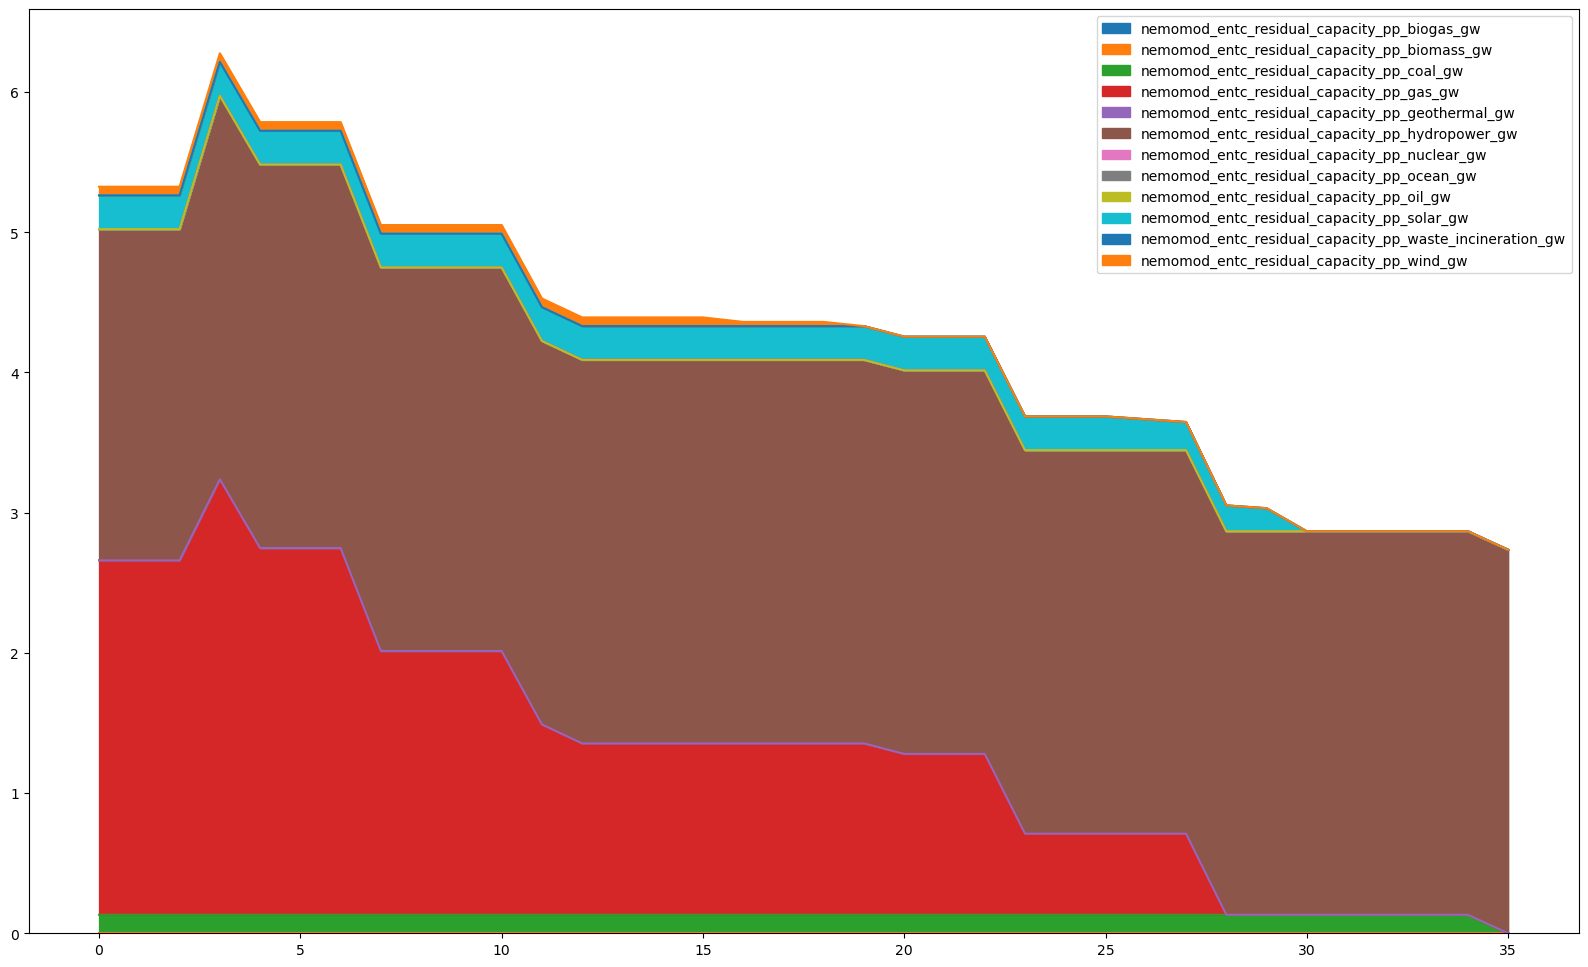

In [30]:
strat_id = 0
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)
print(primary_id)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]


fig, ax = plt.subplots(figsize = (20, 12))

if False:
    sisepuede.model_attributes.get_standard_variables(
        df_filt,
        sisepuede.models.model_electricity.modvar_entc_nemomod_discounted_capital_investment
        #sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    ).plot.area(ax = ax)
else:
    sisepuede.model_attributes.get_standard_variables(
        df_in[df_in[sisepuede.key_strategy] == strat_id],
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)



In [11]:
sisepuede.odpt
df_out[df_out["primary_id"]]

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,1,brazil,0,2.974197e+06,2.044387e+07,1.113471e+06,2.659536e+06,212055.577843,799994.326474,3.503781e+07,...,5.219421e+07,196851.192912,2.171329e+06,5.782080e+07,1.730770e+06,3.259899e+06,1.319115e+07,8.045758e+08,3.115091e+07,1.501269e+07
1,1,brazil,1,2.982617e+06,2.050175e+07,1.116623e+06,2.667066e+06,212655.920008,802259.158792,3.513701e+07,...,4.920900e+07,193261.700104,1.543354e+06,5.486714e+07,1.813966e+06,4.834445e+06,1.256575e+07,8.174413e+08,3.154765e+07,1.552795e+07
2,1,brazil,2,2.991698e+06,2.056417e+07,1.120023e+06,2.675186e+06,213303.366484,804701.695379,3.524398e+07,...,5.302251e+07,200142.548772,1.637262e+06,6.006491e+07,2.139423e+06,4.142347e+06,1.433119e+07,8.120728e+08,3.223501e+07,1.584247e+07
3,1,brazil,3,3.001445e+06,2.063117e+07,1.123672e+06,2.683902e+06,213998.320759,807323.458422,3.535881e+07,...,5.300136e+07,186007.340404,1.822016e+06,6.163253e+07,2.055058e+06,4.897437e+06,1.459610e+07,8.160317e+08,3.230706e+07,1.638111e+07
4,1,brazil,4,3.011864e+06,2.070279e+07,1.127573e+06,2.693219e+06,214741.219084,810126.093710,3.548156e+07,...,5.300873e+07,188027.411430,1.609899e+06,5.707280e+07,2.184369e+06,5.521576e+06,1.407994e+07,8.197551e+08,3.272512e+07,1.675188e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,37038,brazil,31,3.577973e+06,2.459408e+07,1.339511e+06,3.199435e+06,255103.907452,962397.125783,4.215066e+07,...,1.022724e+08,383914.436628,3.331075e+06,1.006927e+08,4.429272e+06,1.175724e+07,3.248648e+07,1.523080e+09,6.917770e+07,3.514275e+07
608,37038,brazil,32,3.610794e+06,2.481968e+07,1.351798e+06,3.228784e+06,257443.973335,971225.186091,4.253731e+07,...,1.051776e+08,395234.154117,3.430106e+06,1.033686e+08,4.559299e+06,1.211284e+07,3.351350e+07,1.565200e+09,7.126106e+07,3.619630e+07
609,37038,brazil,33,3.644557e+06,2.505175e+07,1.364438e+06,3.258974e+06,259851.203490,980306.628260,4.293505e+07,...,1.081903e+08,406956.125395,3.532624e+06,1.061509e+08,4.693970e+06,1.248074e+07,3.457435e+07,1.608925e+09,7.341676e+07,3.728662e+07
610,37038,brazil,34,3.679270e+06,2.529037e+07,1.377434e+06,3.290016e+06,262326.238014,989643.867099,4.334400e+07,...,1.113145e+08,419095.050575,3.638757e+06,1.090435e+08,4.833453e+06,1.286137e+07,3.567024e+07,1.654313e+09,7.564745e+07,3.841505e+07


In [30]:
df_out = sisepuede.read_output(None)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get("brazil").generate_future_from_lhs_vector(None, None, 0, True)



In [35]:

var = sisepuede.models.model_energy.modvar_inen_emissions_ch4
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["primary_id"] == 0], 
    var
).head()

,emission_co2e_ch4_inen_agriculture_and_livestock,emission_co2e_ch4_inen_cement,emission_co2e_ch4_inen_chemicals,emission_co2e_ch4_inen_electronics,emission_co2e_ch4_inen_glass,emission_co2e_ch4_inen_lime_and_carbonite,emission_co2e_ch4_inen_metals,emission_co2e_ch4_inen_other_product_manufacturing,emission_co2e_ch4_inen_paper,emission_co2e_ch4_inen_plastic,emission_co2e_ch4_inen_recycled_glass,emission_co2e_ch4_inen_recycled_metals,emission_co2e_ch4_inen_recycled_paper,emission_co2e_ch4_inen_recycled_plastic,emission_co2e_ch4_inen_recycled_rubber_and_leather,emission_co2e_ch4_inen_recycled_textiles,emission_co2e_ch4_inen_recycled_wood,emission_co2e_ch4_inen_rubber_and_leather,emission_co2e_ch4_inen_textiles
0,0.000652,0.157110,0.153208,0.000519,0.003897,0.000189,0.052969,0.000461,0.447092,0.002900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
1,0.000642,0.153350,0.159578,0.000535,0.003931,0.000169,0.051239,0.000361,0.453517,0.003039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000643
2,0.000642,0.153189,0.159410,0.000535,0.003926,0.000169,0.051184,0.000359,0.453048,0.003035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000642
3,0.000644,0.153027,0.159242,0.000534,0.003920,0.000168,0.051129,0.000358,0.452579,0.003031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
4,0.000644,0.152865,0.159073,0.000534,0.003915,0.000168,0.051073,0.000356,0.452108,0.003027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000640


In [34]:

var = sisepuede.models.model_energy.modvar_inen_en_prod_intensity_factor
sisepuede.model_attributes.get_standard_variables(
    df_in[df_in["strategy_id"] == 0], 
    var
).head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_textiles
0,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
1,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
2,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
3,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
4,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008


In [13]:

var = "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation"
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["time_period"] > 34], 
    var
)

,emission_co2e_co2_entc_generation_pp_biogas,emission_co2e_co2_entc_generation_pp_biomass,emission_co2e_co2_entc_generation_pp_coal,emission_co2e_co2_entc_generation_pp_gas,emission_co2e_co2_entc_generation_pp_geothermal,emission_co2e_co2_entc_generation_pp_hydropower,emission_co2e_co2_entc_generation_pp_nuclear,emission_co2e_co2_entc_generation_pp_ocean,emission_co2e_co2_entc_generation_pp_oil,emission_co2e_co2_entc_generation_pp_solar,emission_co2e_co2_entc_generation_pp_waste_incineration,emission_co2e_co2_entc_generation_pp_wind
0,0.0,22.522807,0.813540,57.079049,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0
1,0.0,20.109595,0.746509,70.568198,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [15]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


<AxesSubplot: >

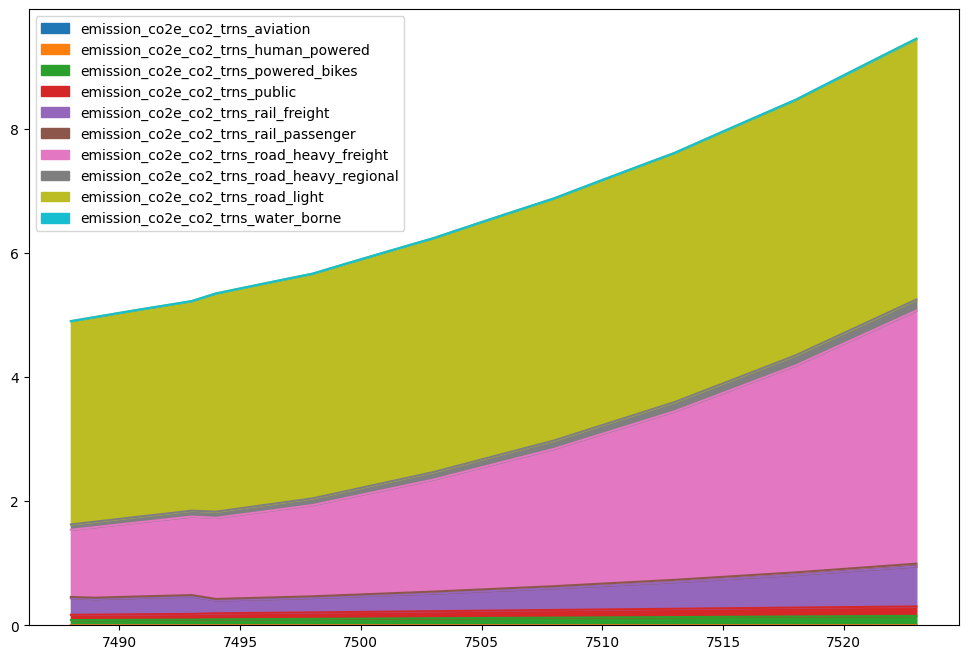

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [8]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [7]:
df_try

,future_id,time_period,strategy_id,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,0,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.625305,0.928300,2.714180,1.650240,4.404067,1.053567,5.752500,74.202600,16.945400,23.352171
1,0,1,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,18.450614,0.908800,1.923760,1.561520,4.602733,1.558033,5.464300,75.176300,17.112775,24.085471
2,0,2,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.820124,0.938300,2.034620,1.704260,5.412067,1.330933,6.213100,74.455900,17.432550,24.498743
3,0,3,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.747876,0.869200,2.256860,1.743060,5.181767,1.568433,6.307400,74.575900,17.414775,25.249429
4,0,4,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.682295,0.875600,1.987220,1.608520,5.488767,1.762200,6.063300,74.657000,17.579100,25.731600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,31,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,33.595444,1.494550,3.391959,2.745561,9.368702,3.007875,10.349365,127.431024,30.005528,43.920920
1256,0,32,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.267352,1.524441,3.459798,2.800472,9.556076,3.068033,10.556352,129.979644,30.605639,44.799338
1257,0,33,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.952699,1.554930,3.528994,2.856482,9.747197,3.129394,10.767479,132.579237,31.217751,45.695325
1258,0,34,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,35.651753,1.586028,3.599574,2.913611,9.942141,3.191981,10.982829,135.230822,31.842106,46.609232


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

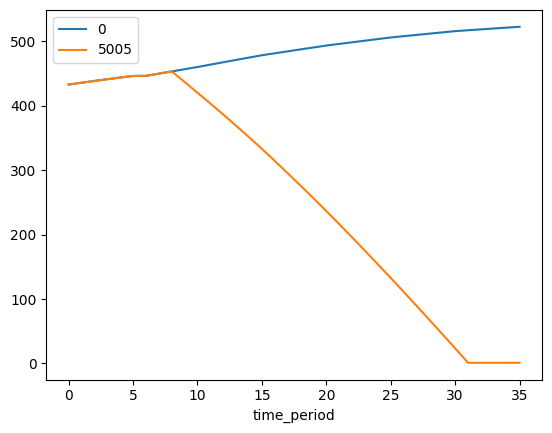

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [65]:
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_electricity as ml
import model_socioeconomic as se
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import sql_utilities as sq
from typing import *
import sqlalchemy
import sql_utilities as sqlutil

import importlib

importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(ml)

#importlib.reload(mafl)

warnings.filterwarnings("ignore")

#df_cs_integrated = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
#df_cs_integrated = df_cs_integrated[
#    df_cs_integrated["strategy_id"].isin([0])
#].reset_index(drop = True)

df_cs_integrated = sisepuede.experimental_manager.dict_future_trajectories.get("peru").generate_future_from_lhs_vector(None, None, 0, True)
df_cs_integrated = df_cs_integrated[
    (df_cs_integrated["strategy_id"] == 3005)
].reset_index(drop = True)

vars_try = [x for x in df_cs_integrated.columns if x.startswith("fuelefficiency_") and ("road_light" in x)]
for x in vars_try:
    df_cs_integrated[x] = min(np.array(df_cs_integrated[x]))

    
model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
model_energy = me.NonElectricEnergy(sa.model_attributes);

# 
df_project_afolu = model_afolu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ce = model_circecon.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ip = model_ippu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ip], sa.model_attributes, "concatenate")

# pass integrated df
df_project_en = model_energy.project(df_cs_integrated);
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_en], sa.model_attributes, "concatenate")

model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger)


In [66]:
sisepuede.model_attributes.get_standard_variables(
    df_cs_integrated,
    model_energy.modvar_inen_energy_consumption_total
)

,energy_consumption_inen_agriculture_and_livestock,energy_consumption_inen_cement,energy_consumption_inen_chemicals,energy_consumption_inen_electronics,energy_consumption_inen_glass,energy_consumption_inen_lime_and_carbonite,energy_consumption_inen_metals,energy_consumption_inen_other_product_manufacturing,energy_consumption_inen_paper,energy_consumption_inen_plastic,energy_consumption_inen_recycled_glass,energy_consumption_inen_recycled_metals,energy_consumption_inen_recycled_paper,energy_consumption_inen_recycled_plastic,energy_consumption_inen_recycled_rubber_and_leather,energy_consumption_inen_recycled_textiles,energy_consumption_inen_recycled_wood,energy_consumption_inen_rubber_and_leather,energy_consumption_inen_textiles
0,3.159000,242.661005,18.839838,0.418887,0.436975,0.336364,313.939442,0.278809,21.868323,8.131261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119719,1.287580
1,3.137413,240.588907,18.858404,0.420287,0.429323,0.336306,314.112042,0.260651,22.071983,8.145407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119671,1.287892
2,3.176989,241.390972,18.921273,0.421688,0.428351,0.337427,315.150235,0.264126,22.119334,8.159666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119882,1.290949
3,3.220262,242.185120,18.983522,0.423075,0.427325,0.338537,316.177628,0.267602,22.164753,8.173101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120086,1.293897
4,3.252176,242.971533,19.045164,0.424449,0.426307,0.339636,317.195294,0.271078,22.210414,8.186709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120288,1.296857
5,3.341644,243.750383,19.106214,0.425809,0.425344,0.340725,318.204054,0.274554,22.257866,8.201201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120494,1.299916
6,3.432190,245.686597,19.257983,0.429192,0.425996,0.343431,320.753114,0.283277,22.482030,8.286031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121330,1.313494
7,3.529621,247.578092,19.406246,0.432496,0.424684,0.346075,323.218604,0.292001,22.637461,8.339671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121945,1.323186
8,3.631408,249.427205,19.551188,0.435726,0.423279,0.348660,325.628729,0.300724,22.788952,8.391856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122538,1.332645
9,3.737724,251.236088,19.692976,0.438886,0.421784,0.351189,327.986297,0.309448,22.936703,8.442661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123111,1.341884


In [89]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
os.remove(fp_sqlite_intermediate) if os.path.exists(fp_sqlite_intermediate) else None
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")
t0 = time.time()
df_test = model_elec.project(df_cs_integrated, engine = engine)
t1 = time.time()

2023-02-20 00:09:39,451 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-20-Feb 00:09:39.455 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-20-Feb 00:09:39.487 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:10:00,252 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>


2023-20-Feb 00:09:41.195 Started modeling scenario.
2023-20-Feb 00:10:00.056 Finished modeling scenario.


In [78]:
table_name = "vregenerationannualnn"
#table_name = "vproductionbytechnologyannual"
#table_name = "REMinProductionTarget"
df = sqlutil.sql_table_to_df(engine, table_name)


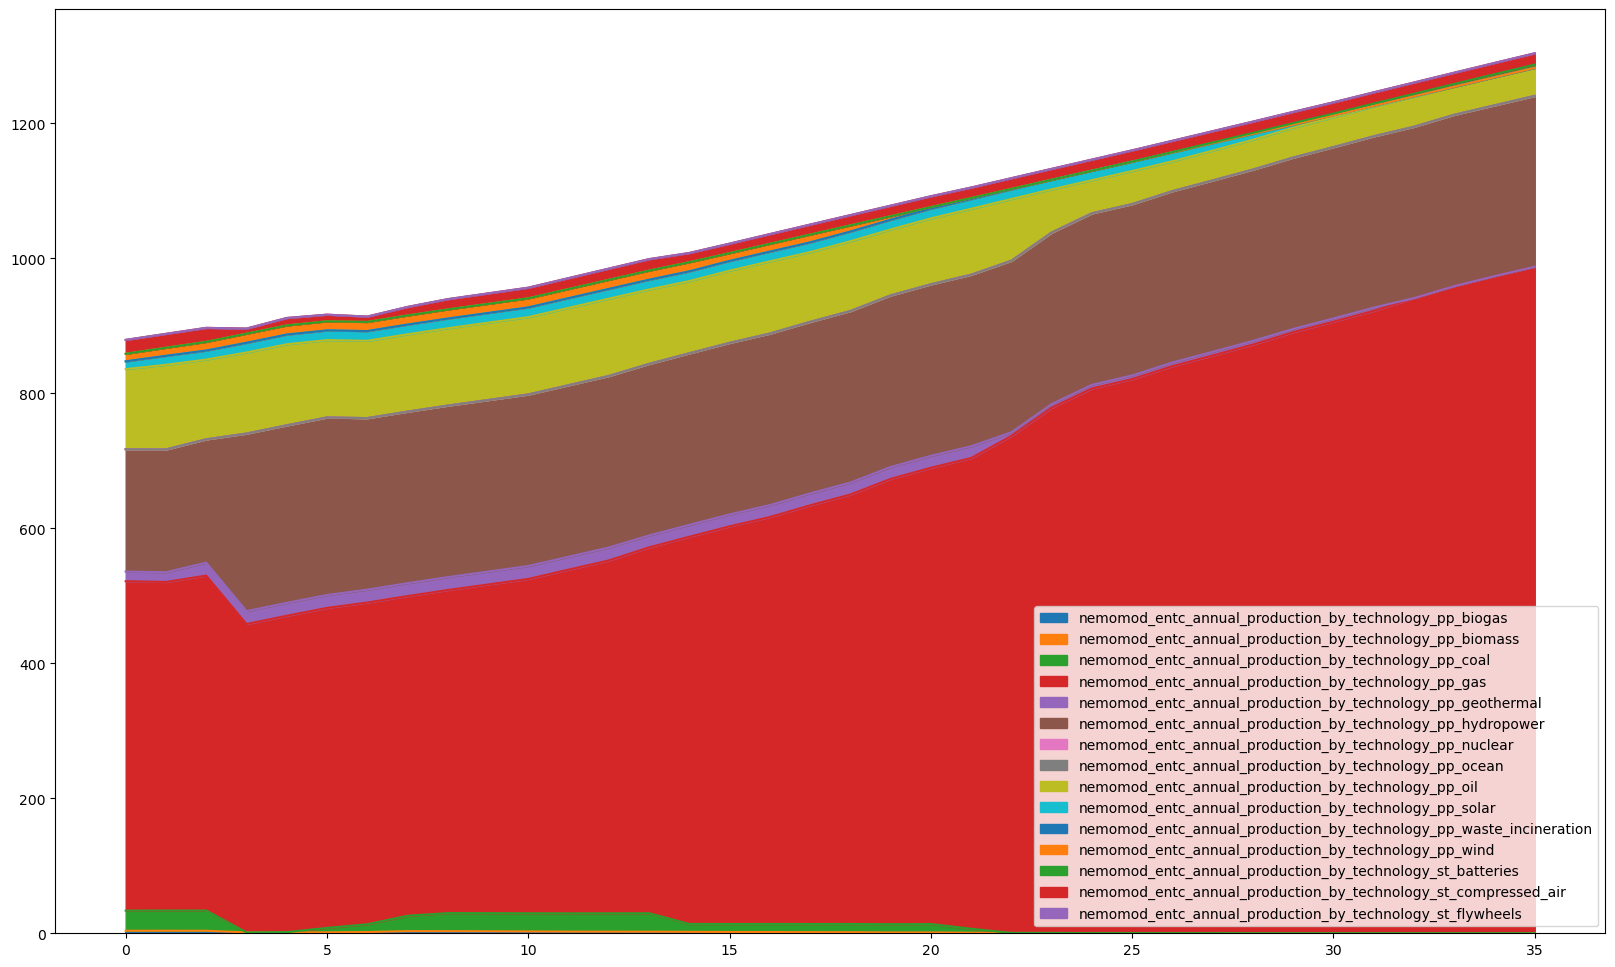

In [90]:

dict_filt2 = {}


fig, ax = plt.subplots(figsize = (20, 12))

if True:
    sisepuede.model_attributes.get_standard_variables(
        df_test,
        sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    ).plot.area(ax = ax)
else:
    sisepuede.model_attributes.get_standard_variables(
        df_cs_integrated,
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)

In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [9]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [31]:
import inspect
sisepuede.odpt_primary.get_key_value(
    strategy_id = 3011,
    future_id = 0, 
    design_id = 0
)




15015

In [17]:
df_out[
    (df_out["region"] == "brazil") & 
    (df_out["time_period"].isin([4, 5])) & 
    (df_out["primary_id"].isin([0, 15015])) 
][
    [x for x in df_out.columns if ("emission_co2e" in x) and ("trns" in x)]
]


,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
940,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.122332,0.006572,1.316938,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.923724,0.047992,3.556169,0.000371,237.558203
941,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.120889,0.006596,1.322850,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.910773,0.048171,3.572172,0.000370,237.439346
1336,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.123489,0.006572,1.320636,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.935050,0.047992,3.565980,0.000371,238.819438
1337,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.122964,0.006596,1.327975,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.931073,0.048171,3.585797,0.000370,239.514858


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

